# Stock Sentiment from FINVIZ.com
Generate investing insight by applying sentiment analysis on financial news headlines from FINVIZ.com by natural language processing technique

In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [2]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG','AAPL','FB']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [3]:
# Read one single day of headlines for 'tsla' 
tsla = news_tables['TSLA']
# Get all the table rows tagged in HTML with <tr> into 'tsla_tr'
tsla_tr = tsla.findAll('tr')

for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Dow Jones Futures: Stock Market Rally Livin' On The Edge; Take These Three Steps Now
Sep-13-20 01:11PM  
Nikola Founder Predicts Fun Ride for Stock. Careful There.
11:18AM  
Its Not Just SoftBank: How Retail Investors Are Fueling the Nasdaqs Wild Ride
11:17AM  
3 Stocks for an Electric Vehicle Future Not Named Tesla or Nikola
10:52AM  


In [4]:
# Read one single day of headlines for 'FB' 
fb = news_tables['FB']
# Get all the table rows tagged in HTML with <tr> into 'fb_tr'
fb_tr = fb.findAll('tr')

for i, table_row in enumerate(fb_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Facebook removes posts linking Oregon wildfires to activist groups
Sep-12-20 09:17PM  
How the end of 'Keeping Up with the Kardashians' hints at cable TV's demise
12:12PM  
Delhi city lawmakers summon Facebook India chief over February riots
09:15AM  
Buying These 3 Stocks in a Market Crash Could Lead to Explosive Returns
08:00AM  


# Parses the date, time and headlines into a Python list called parsed_news

In [5]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
 
parsed_news[:5]

[['AMZN', 'Sep-13-20', '12:25PM', 'Better Buy: Amazon vs. Best Buy'],
 ['AMZN',
  'Sep-13-20',
  '08:17AM',
  "Netflix users 'don't really care' whether content is created by Netflix, co-CEO says"],
 ['AMZN', 'Sep-13-20', '06:06AM', '3 Growth Stocks for In-the-Know Investors'],
 ['AMZN',
  'Sep-13-20',
  '05:00AM',
  "Netflix users 'don't really care' whether content is original: Reed Hastings"],
 ['AMZN',
  'Sep-12-20',
  '03:16PM',
  "Barron's Picks And Pans: Amazon, Crocs, GM, Microsoft And More"]]

## Perform sentiment analysis with nltk.sentiment.vader

In [6]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2020-09-13,12:25PM,Better Buy: Amazon vs. Best Buy,0.000,0.254,0.746,0.8316
1,AMZN,2020-09-13,08:17AM,Netflix users 'don't really care' whether cont...,0.180,0.694,0.126,-0.2131
2,AMZN,2020-09-13,06:06AM,3 Growth Stocks for In-the-Know Investors,0.000,0.606,0.394,0.3818
3,AMZN,2020-09-13,05:00AM,Netflix users 'don't really care' whether cont...,0.201,0.636,0.163,-0.1393
4,AMZN,2020-09-12,03:16PM,"Barron's Picks And Pans: Amazon, Crocs, GM, Mi...",0.000,0.841,0.159,0.1779


In [7]:
parsed_and_scored_news.tail()

,ticker,date,time,headline,neg,neu,pos,compound
495,FB,2020-09-04,09:38AM,Family-Held Companies Produce Superior Returns...,0.000,0.596,0.404,0.7269
496,FB,2020-09-04,09:20AM,Apple Is Cutting Mobile Advertisers Some Slack,0.200,0.800,0.000,-0.1280
497,FB,2020-09-04,06:00AM,Twitters Un-Famous Users Can Make Money From V...,0.000,1.000,0.000,0.0000
498,FB,2020-09-04,01:33AM,Apple Delays Rolling Out Privacy Feature After...,0.177,0.823,0.000,-0.4215
499,FB,2020-09-04,01:33AM,"Facebook election plan patches some holes, cre...",0.000,0.769,0.231,0.2732


### Bar Chart of the Sentiment Score

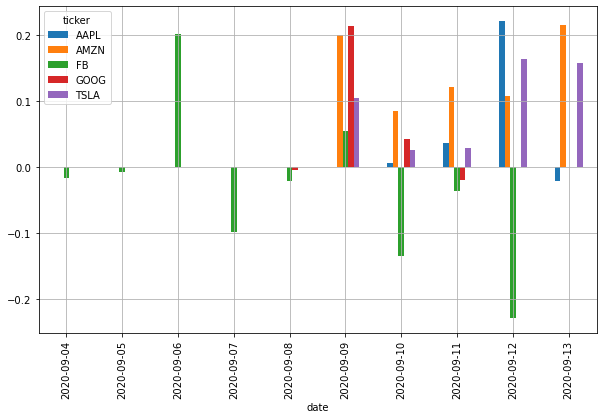

In [8]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [9]:
# Clean up the dataset more
# Count the number of headlines in scored_news (store as integer)
num_news_before = parsed_and_scored_news.headline.count()
# Drop duplicates based on ticker and headline
scored_news_clean =parsed_and_scored_news.drop_duplicates(subset=['headline', 'ticker'])
# Count number of headlines after dropping duplicates (store as integer)
num_news_after = scored_news_clean.headline.count()
# Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"

'Before we had 500 headlines, now we have 490'

### Sentiment on one single trading day _ AAPL

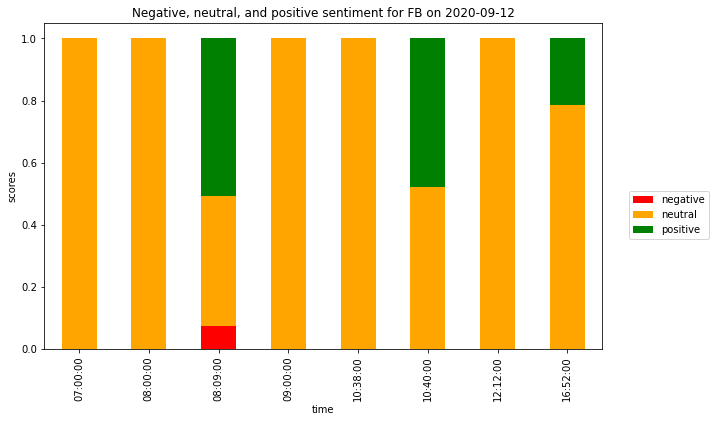

In [10]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.xs('AAPL')
# Select the 3rd of January of 2019
single_day = single_day.loc['2020-09-12']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time']).dt.time
# Set the index to time and sort by it
single_day = single_day.set_index('time')
# Sort it
single_day = single_day.sort_index()

TITLE = "Negative, neutral, and positive sentiment for FB on 2020-09-12"
COLORS = ["red","orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(['compound', 'headline'], 1)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']
# Plot a stacked bar chart
plot_day.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel("scores");

### Sentiment on one single trading day _ TSLA

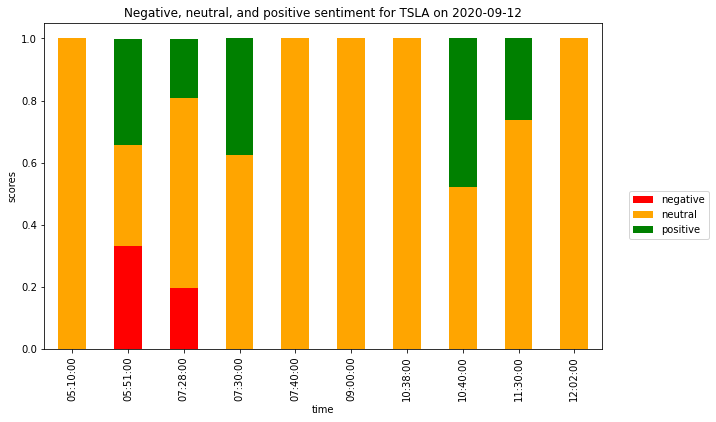

In [13]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.xs('TSLA')
# Select the 3rd of January of 2019
single_day = single_day.loc['2020-09-12']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time']).dt.time
# Set the index to time and sort by it
single_day = single_day.set_index('time')
# Sort it
single_day = single_day.sort_index()

TITLE = "Negative, neutral, and positive sentiment for TSLA on 2020-09-12"
COLORS = ["red","orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(['compound', 'headline'], 1)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']
# Plot a stacked bar chart
plot_day.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel("scores");

In [ ]:
### Sentiment on one single trading day _ AMAZON

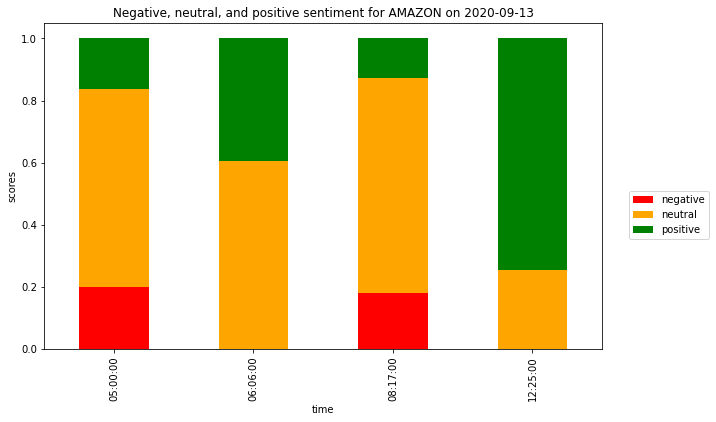

In [17]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.xs('AMZN')
# Select the 3rd of January of 2019
single_day = single_day.loc['2020-09-13']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time']).dt.time
# Set the index to time and sort by it
single_day = single_day.set_index('time')
# Sort it
single_day = single_day.sort_index()

TITLE = "Negative, neutral, and positive sentiment for AMAZON on 2020-09-13"
COLORS = ["red","orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(['compound', 'headline'], 1)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']
# Plot a stacked bar chart
plot_day.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel("scores");

On some days without news headlines for any particular stock, there would be no sentiment score.